In [29]:
import pandas as pd
from sklearn.preprocessing import label_binarize

# read the data
X_train = pd.read_csv('X23241.csv').values[:,1:]
y_train = pd.read_csv('Y23241.csv').values[:,1].ravel().astype(int)

y_train = label_binarize(y_train, classes=[1, 2, 3, 4, 5, 6, 7])
n_classes = y_train.shape[1]

In [30]:
from sklearn.model_selection import train_test_split

# split the data
X_train_sub, X_test, y_train_sub, y_test = \
    train_test_split(X_train, y_train, test_size=0.2, random_state=1, stratify=y_train)

print('Train/Test sizes:', y_train_sub.shape[0], y_test.shape[0])

Train/Test sizes: 18592 4649


In [31]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=123,
                              criterion= 'gini',
                              max_depth=21,
                              min_samples_split=2)

In [32]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100,
                                criterion="entropy",
                                random_state=123)

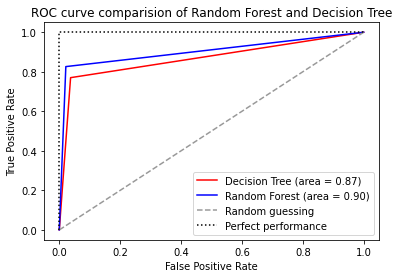

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_auc_score

# micro-average for decision tree
y_score = tree.fit(X_train_sub, y_train_sub).predict(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# micro-average for random forest
y_score1 = forest.fit(X_train_sub, y_train_sub).predict(X_test)

fpr1 = dict()
tpr1 = dict()
roc_auc1 = dict()
for i in range(n_classes):
    fpr1[i], tpr1[i], _ = roc_curve(y_test[:, i], y_score1[:, i])
    roc_auc1[i] = auc(fpr1[i], tpr1[i])

fpr1["micro"], tpr1["micro"], _ = roc_curve(y_test.ravel(), y_score1.ravel())
roc_auc1["micro"] = auc(fpr1["micro"], tpr1["micro"])

# ROC curve of decision tree
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="Decision Tree (area = %0.2f)" %(roc_auc["micro"]),
    color="red"
)

# ROC curve of drandom forest
plt.plot(
    fpr1["micro"],
    tpr1["micro"],
    label="Random Forest (area = %0.2f)" %(roc_auc1["micro"]),
    color="blue"
)


plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve comparision of Random Forest and Decision Tree")
plt.legend(loc="lower right")

plt.savefig("RT and DT.png")
plt.show()